In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd


# scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Reading the data
dataset = pd.read_csv("Dataset/Desharnais.csv")
dataset.head()


max_corr_features =  [ 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']


x=np.array(dataset[max_corr_features])

y=np.array(dataset['Effort'])

In [2]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)
y=np.reshape(y,(81,1))
y=scaler.fit_transform(y)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

regressor = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=10, random_state=0).fit(x_train, y_train.ravel())

y_pred=regressor.predict(x_test)

In [5]:
regressor.fit(x_train, y_train)
print(regressor.score(x_train,y_train))

0.9054133169500096


c:\Users\sachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [6]:
#accuracy on testdata on Model
regressor.fit(x_test, y_test)
print(regressor.score(x_test,y_test))

0.8933132748095285


c:\Users\sachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [7]:
y_test

array([[0.05685218],
       [0.18940754],
       [0.16876122],
       [0.19688809],
       [0.61669659],
       [0.36714542],
       [0.01256732],
       [0.00701034],
       [0.15499701],
       [0.0855775 ],
       [0.19808498],
       [0.32076601],
       [0.15948534],
       [0.22531418],
       [0.1454219 ],
       [0.03081987],
       [0.36564931]])

In [8]:
y_pred=np.reshape(y_pred,(17,1))
y_test=np.reshape(y_test,(17,1))

In [9]:
y_test

array([[0.05685218],
       [0.18940754],
       [0.16876122],
       [0.19688809],
       [0.61669659],
       [0.36714542],
       [0.01256732],
       [0.00701034],
       [0.15499701],
       [0.0855775 ],
       [0.19808498],
       [0.32076601],
       [0.15948534],
       [0.22531418],
       [0.1454219 ],
       [0.03081987],
       [0.36564931]])

In [10]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [11]:





def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )
# RMSE (Root Mean Square Error)
mse=mean_squared_error(y_test, y_pred)
print("\nMSE:\n",mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE:\n",rmse)
mape=mape(y_test, y_pred)
print("\nMAPE:\n",mape)

smape = calculate_smape(y_test, y_pred)
print("\nSMAPE:\n",smape)
r2_score=1 - (1-regressor.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print("\n Adj R2 score:\n",r2_score)


MSE:
 0.014189671481793724

RMSE:
 0.11912040749507921

MAPE:
 120.54296302028693

SMAPE:
 55.32

 Adj R2 score:
 0.1500714352483532


In [12]:
y_pred=scaler.inverse_transform(y_pred)

In [13]:
y_test=scaler.inverse_transform(y_test)

In [14]:
y_test=np.reshape(y_test,(17,))
y_pred=np.reshape(y_pred,(17,))

In [15]:
dfr=pd.DataFrame({'Actual Effort':y_test, 'Predicted Effort':y_pred})
print(dfr)

    Actual Effort  Predicted Effort
0          1876.0            1746.5
1          4977.0            5280.8
2          4494.0            5154.8
3          5152.0            3397.8
4         14973.0            7540.4
5          9135.0            8908.2
6           840.0            1792.7
7           710.0            2379.4
8          4172.0            2848.3
9          2548.0            1338.1
10         5180.0            8720.6
11         8050.0            9690.1
12         4277.0            6937.0
13         5817.0            3472.0
14         3948.0            8149.4
15         1267.0            1948.8
16         9100.0           13602.4


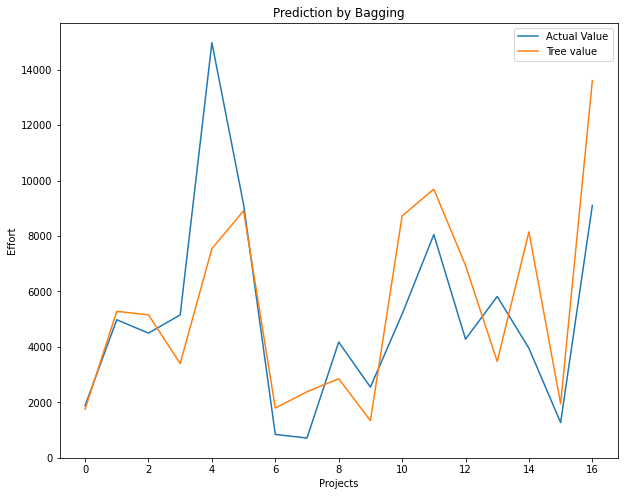

In [16]:
#Predicted vs Actual Close Value 
from matplotlib import pyplot as plt 
plt.figure(figsize=(10,8))
plt.plot(y_test, label="Actual Value")
plt.plot(y_pred, label="Tree value")
plt.title("Prediction by Bagging")
plt.xlabel("Projects")
plt.ylabel("Effort")
plt.legend()
plt.show()